In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
result = {}
test_cases = [0,1,2,3,4,5, 'train_83p']
colors = ["blue", "red", "green", "yellow", "purple", "orange", 'brown']

for tc in test_cases:
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    y_pred = archive["y_pred"]
    y_gt = archive["y_gt"]

    x_values = []
    y_values = []

    gt_freq = [0] * 100
    pred_freq = [0] * 100

    pred, gt = compute_pitch_list_from_archive(y_pred, y_gt)

    for i in range(len(gt)):
        gt_i = gt[i]
        pred_i = pred[i]
        #if there is a pitch greater than 0
        if gt_i > 0:
            gt_freq[gt_i] += 1
            if gt_i == pred_i:
                pred_freq[pred_i] += 1

    for i in range(40, 84):
        if gt_freq[i] > 0:
            r = pred_freq[i] / gt_freq[i]
            x_values.append(i)
            y_values.append(r)

    print(f"Test case {tc} - {sum(y_values)/len(y_values)}")
    result[f"test_{tc}"] = {"x" : x_values, "y" : y_values}

Test case 0 - 0.6224877358731481
Test case 1 - 0.8071554838193029
Test case 2 - 0.7588284074960477
Test case 3 - 0.7657657458431651
Test case 4 - 0.7749745322272072
Test case 5 - 0.7768268676974392
Test case train_83p - 0.806387065606895


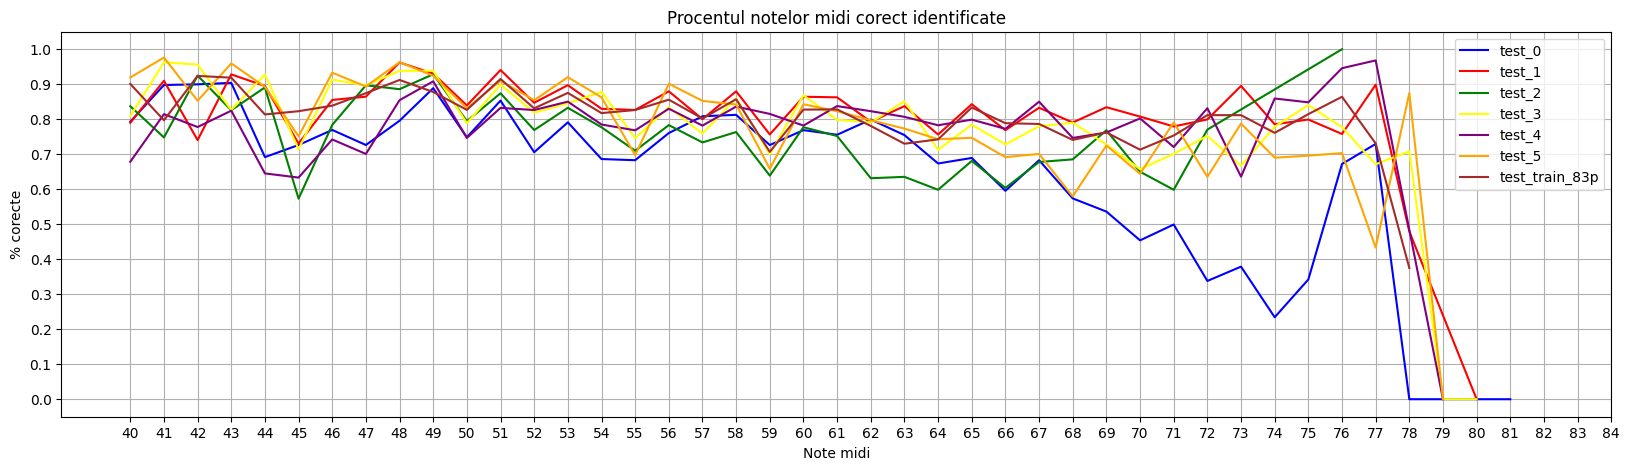

In [3]:
plt.figure(figsize=(20, 5), facecolor="white")


for i, tc in enumerate(result.keys()):
    x_values = result[tc]["x"]
    y_values = result[tc]["y"]
    plt.plot(x_values, y_values, label=tc, color=colors[i])

plt.xlabel("Note midi")
plt.ylabel("% corecte")
plt.grid(True)
plt.title("Procentul notelor midi corect identificate")
plt.xticks(np.arange(40, 85, step=1))
plt.yticks(np.arange(0,1.1, step=0.1))
plt.legend()
plt.show()

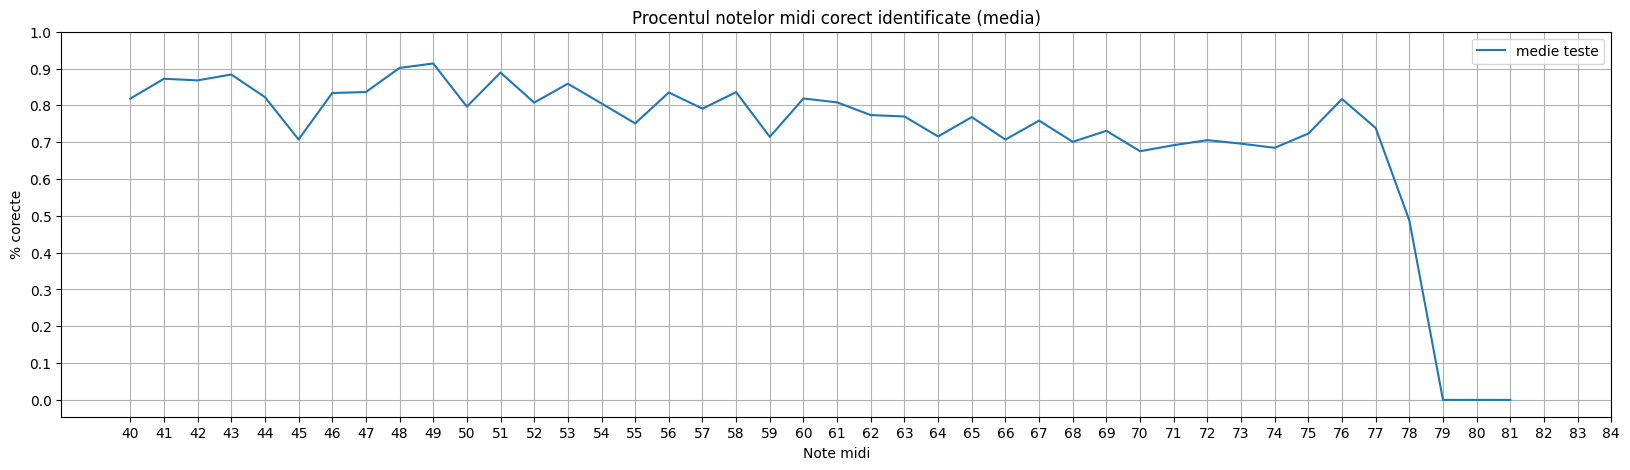

In [5]:
x_values_all = []
y_values_all = []
for i in range(40, 84):
    y_val = 0
    k = 0
    for tc in result.keys():
        if i in result[tc]["x"]:
            y_val += result[tc]["y"][result[tc]["x"].index(i)]
            k += 1
    if k > 0:
        x_values_all.append(i)
        y_values_all.append(y_val/k)

plt.figure(figsize=(20,5))
plt.xlabel("Note midi")
plt.ylabel("% corecte")
plt.grid(True)
plt.title("Procentul notelor midi corect identificate (media)")
plt.plot(x_values_all, y_values_all, label='medie teste')
plt.xticks(np.arange(40, 85, step=1))
plt.yticks(np.arange(0,1.1, step=0.1))
plt.legend()
plt.show()